# Explore here

In [2]:
from dotenv import load_dotenv
load_dotenv()
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [3]:
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
tracks = sp.artist_top_tracks(artist_id='51Blml2LZPmy7TTiAg47vQ')

In [61]:
df = pd.DataFrame(columns=['Songs', 'Duration', 'Popularity'])
for i in range(len(tracks['tracks'])):
    df = df.append({'Songs':tracks['tracks'][i]['name'], 'Duration':tracks['tracks'][i]['duration_ms'], 'Popularity':tracks['tracks'][i]['popularity']}, ignore_index=True)

/tmp/ipykernel_541/2768786336.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Songs':tracks['tracks'][i]['name'], 'Duration':tracks['tracks'][i]['duration_ms'], 'Popularity':tracks['tracks'][i]['popularity']}, ignore_index=True)
/tmp/ipykernel_541/2768786336.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Songs':tracks['tracks'][i]['name'], 'Duration':tracks['tracks'][i]['duration_ms'], 'Popularity':tracks['tracks'][i]['popularity']}, ignore_index=True)
/tmp/ipykernel_541/2768786336.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Songs':tracks['tracks'][i]['name'], 'Duration':tracks['tracks'][i]['duration_ms'], 'Popularity':tracks['tracks'][i]['popularity']}, ig

In [63]:
for item in df['Duration']:
  df['Duration'].replace(item, ((item/(1000*60))%60), inplace=True)

In [64]:
df = df.sort_values(by='Popularity')
df.head(3)

Songs  Duration Popularity
5  Pride (In The Name Of Love) - Remastered 2009  3.807100         65
2                                  Beautiful Day  4.106667         68
8                                 Sweetest Thing  3.075717         70

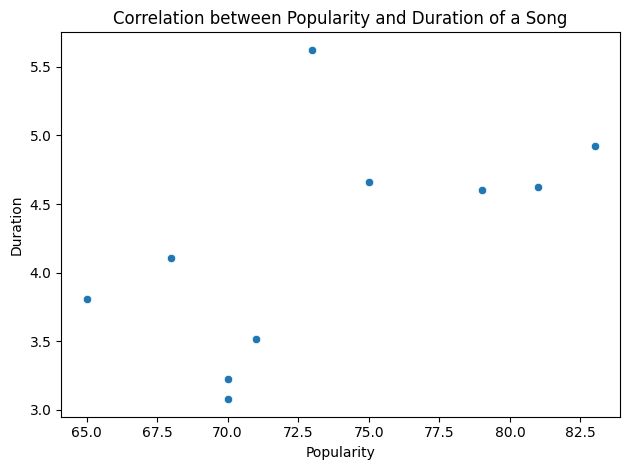

In [65]:
sns.scatterplot(df, x='Popularity', y='Duration')
plt.title('Correlation between Popularity and Duration of a Song')
plt.xlabel('Popularity')
plt.ylabel('Duration')
plt.tight_layout()
plt.show()